**Submitted to- Dr Prakash Tiwari**

Submitted by- Ajay Singh(1000017664)

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
df = pd.read_csv("/content/submission.csv")

In [ ]:
if df["Tweets"].isnull().any():
    print("There are missing values in the 'tweet' column.")

In [ ]:
tweets = df["Tweets"]

In [ ]:
def preprocess_text(text):
    """
    Preprocesses text data for sentiment analysis:
    - Converts to lowercase
    - Removes punctuation
    - Removes stopwords
    - Performs stemming (optional)
    - Replaces slang or special characters (optional)
    """

    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove punctuation
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])

    # Optional stemming (consider potential information loss)
    # stemmer = PorterStemmer()
    # text = " ".join([stemmer.stem(word) for word in text.split()])

    return text

tweets = np.vectorize(preprocess_text)(tweets)
print(np.vectorize(preprocess_text)(tweets))

['last session day httptwitpiccom67ezh' 'exciting' 'recession' ...
 'know mean little dog sinking depression wants move someplace tropical'
 'love videos' 'cute']


In [ ]:
vectorizer = TfidfVectorizer(max_features=2000, use_idf=True)  # Adjust max_features as needed
features = vectorizer.fit_transform(tweets)
print(vectorizer.fit_transform(tweets))

  (0, 368)	0.4305693981087973
  (0, 1578)	0.7513278427573057
  (0, 839)	0.5001164525486854
  (1, 494)	1.0
  (2, 1426)	1.0
  (3, 138)	0.8708864247287711
  (3, 676)	0.49148431838985307
  (4, 865)	1.0
  (6, 681)	1.0
  (7, 171)	1.0
  (8, 1778)	0.4934087975816411
  (8, 1597)	0.7068063608382047
  (8, 839)	0.5069245769813222
  (9, 1762)	0.2913082837486215
  (9, 1651)	0.3035486050797148
  (9, 853)	0.3709179020826211
  (9, 1986)	0.3076580982062392
  (9, 83)	0.3391356517573298
  (9, 407)	0.3170187158844651
  (9, 683)	0.32847518602405734
  (9, 68)	0.39964927937928724
  (9, 606)	0.23490414925318842
  (9, 368)	0.22903017815158833
  (10, 212)	0.4326644632243319
  (10, 1799)	0.4733084496422896
  :	:
  (3524, 482)	0.24526302973535283
  (3524, 754)	0.23921330696591667
  (3525, 601)	0.3723993368632534
  (3525, 1772)	0.38338970500308023
  (3525, 1862)	0.33826013523913867
  (3525, 1250)	0.36341955224841427
  (3525, 1791)	0.27382152945067995
  (3525, 982)	0.34344939949374836
  (3525, 1713)	0.36341955224841

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiment_labels = []
for tweet in tweets:
    scores = analyzer.polarity_scores(tweet)
    if scores["compound"] > 0.1:
        sentiment_labels.append("Positive")
    elif scores["compound"] < -0.1:
        sentiment_labels.append("Negative")
    else:
        sentiment_labels.append("Neutral")

In [ ]:
df["sentiment"] = sentiment_labels

In [ ]:
df.head()

,textID,Tweets,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,Neutral
1,96d74cb729,exciting,Positive
2,eee518ae67,Recession,Negative
3,01082688c6,happy bday!,Positive
4,33987a8ee5,I like it!!,Positive


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, df["sentiment"], test_size=0.2, random_state=42)

# Train a Naive Bayes model (consider other classifiers for different datasets)
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate model performance on test set (e.g., accuracy, precision, recall, F1-score)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.56      0.69       179
     Neutral       0.69      0.51      0.59       232
    Positive       0.63      0.90      0.74       296

    accuracy                           0.69       707
   macro avg       0.74      0.66      0.67       707
weighted avg       0.72      0.69      0.68       707



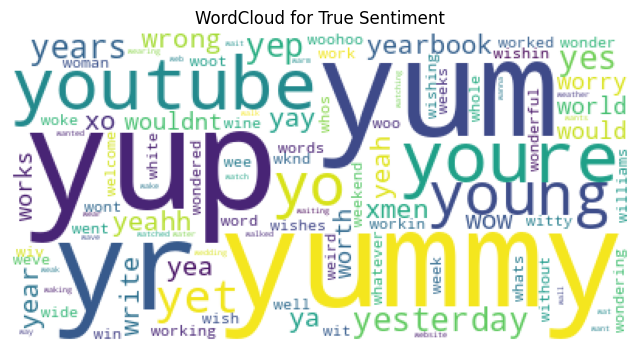

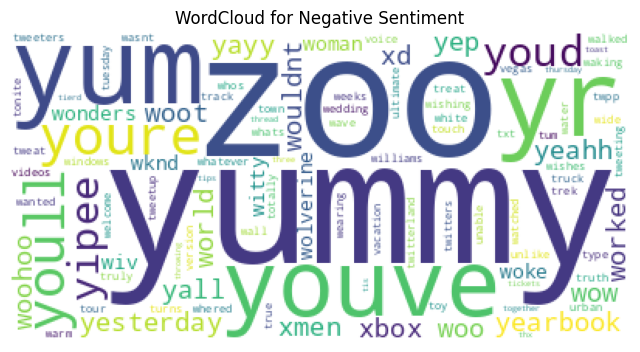

In [ ]:
def create_wordcloud(text, pos_sentiment=True):
    """
    Creates and displays a WordCloud for positive or negative sentiment analysis.
    """

    stop_words = set(stopwords.words("english"))
    wordcloud = WordCloud(background_color="white", max_words=100, stopwords=stop_words)

    if pos_sentiment:
        words = {word: count for word, count in vectorizer.vocabulary_.items() if word in text}
    else:
        words = {
            word: count
            for word, count in vectorizer.vocabulary_.items()
            if word not in text
        }

    wordcloud.generate_from_frequencies(words)
    plt.figure(figsize=(8, 5))  # Adjust figure size as needed
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"WordCloud for {pos_sentiment} Sentiment" if pos_sentiment else "WordCloud for Negative Sentiment")
    plt.show()  # Display the WordCloud

positive_wordcloud = create_wordcloud(text=" ".join(df[df["sentiment"] == "Positive"]["Tweets"]))
negative_wordcloud = create_wordcloud(text=" ".join(df[df["sentiment"] == "Negative"]["Tweets"]), pos_sentiment=False)

This is the analysis of tweets. I have taken the data from kaggle and then clean and preprocess it. After cleaning and preprocesing i created tfidf and Bag of words. Then i created a new sentiment coloumn in the data frame which has three sentiment types positive, neutral and negative. Created a Naive Bayes model to test the accuracy of the model. After getting classification report i make the word cloud .

Overall i find that accuracy is not good for the same model it is only 69% overall accuracy.